# Basic image manipulation
In the following examples, we will show basic operations to manipulate images, such as cropping, rotating and resizing.

---

## Cropping an image
### Problem
You want to crop the given image `orka.tif`, so that only the the pixels in the ranges 50-150 on the y-axis and 100-250 on the x-axis remain.
### Solution
To crop the image, you can index the array to retain the area you want to keep: ```image[start_y:stop_y , start_x:stop_x]```. 

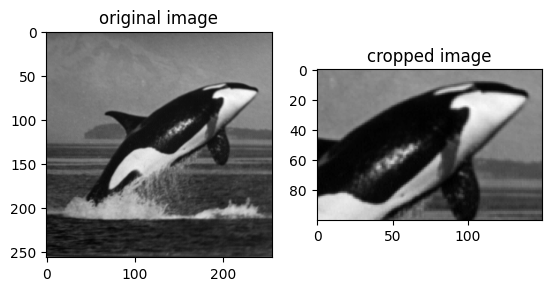

In [1]:
import matplotlib.pyplot as plt
im = plt.imread('orka.tif')
cropped_im = im[50:150, 100:250]
fig, ax = plt.subplots(1,2)
ax[0].imshow(im, cmap = 'gray')
ax[0].set_title('original image')
ax[1].imshow(cropped_im, cmap = 'gray')
ax[1].set_title('cropped image');

### Discussion
As you can see, the result is the cropped image we wanted. 
Keep in mind that when indexing an image, the y-axis is adressed in the first argument and the x-axis in the second.
You should also note that the last pixel of a range, i.e the 150th row of pixels in this example, is not included in the selected range, although this is hardly noticeable in this example. 

---

### Problem
Crop the image `orka.tif` equally from all sides, so that the resulting image is half the size of the original. Do not use explicit pixel-values.

### Solution
To crop the image without using explicit index values, we can use the `shape` function of `numpy` to dinamically calculate the indices instead.

(256, 256)


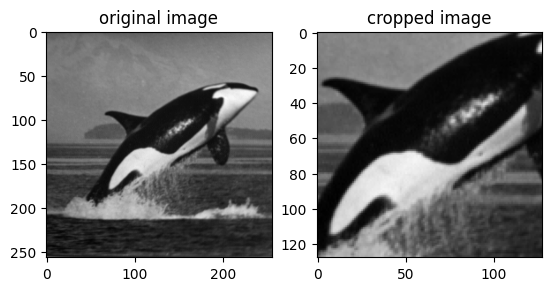

In [2]:
im_shape = im.shape
print(im_shape)
cropped_im = im[int(im_shape[0]*0.25):int(im_shape[0]*0.75), int(im_shape[1]*0.25):int(im_shape[1]*0.75)]
fig, ax = plt.subplots(1,2)
ax[0].imshow(im, cmap = 'gray')
ax[0].set_title('original image')
ax[1].imshow(cropped_im, cmap = 'gray')
ax[1].set_title('cropped image');

### Discussion
To crop the image dinamically, we have to calculate the new pixel ranges based on the size of the original size. The numpy-function `.shape` returns a touple with the dimensions of the array. In our case, `im.shape` returns `(256, 256)`, because the original image spans 256 x 256 pixels. By muliplying these values with 0.25 or 0.75, we can calculate our new starting and ending indices, respectively. Note that we have to cast the resulting floating point number to an integer using `int()`, since the index of an array needs to be an integer.

---

## Rotation
### Problem
Mirror the image `orca.tif` along its y-axis.

### Solution
By passing `-1` in the `step` parameter for the x-coordinates, the can reverse the direction. `im[:, ::-1]`.

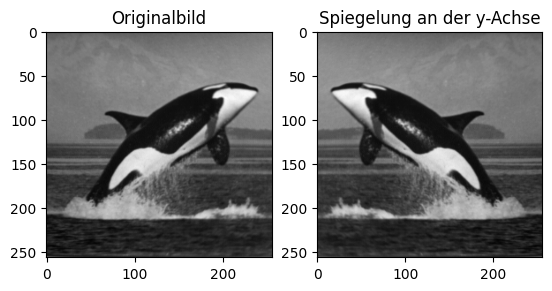

In [5]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(im, cmap = 'gray')
ax[0].set_title("Originalbild")
ax[1].imshow(im[:, ::-1], cmap="gray")
ax[1].set_title("Spiegelung an der y-Achse");

### Discussion
The same solution also works on the y-axis or in combination.

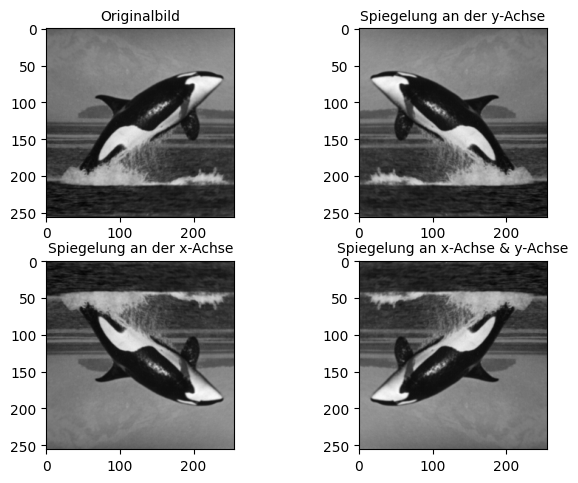

In [11]:
fig, ax = plt.subplots(2,2)
fig.tight_layout()
ax[0,0].imshow(im, cmap = 'gray')
ax[0,0].set_title("Originalbild", fontsize=10)
ax[0,1].imshow(im[:, ::-1], cmap="gray")
ax[0,1].set_title("Spiegelung an der y-Achse", fontsize=10);
ax[1,0].imshow(im[::-1], cmap="gray")
ax[1,0].set_title("Spiegelung an der x-Achse", fontsize=10);
ax[1,1].imshow(im[::-1, ::-1], cmap="gray")
ax[1,1].set_title("Spiegelung an x-Achse & y-Achse", fontsize=10);

---

### Problem
Rotate at other angles.

---

## Translation
### Problem
Create a copy of `orca.tif` of the dimensions, where the original content is shifted 50 pixels to the left and the rest ist filled up with black.

### Solution


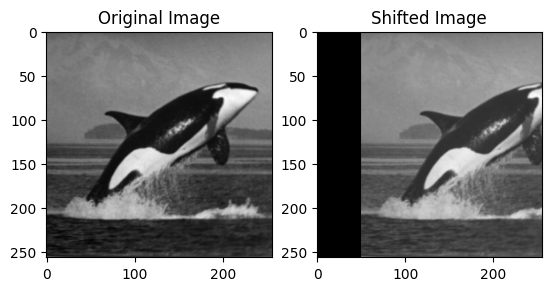

In [20]:
import numpy as np
shift_width = 50
im_width = im.shape[1]
im_shift = np.zeros_like(im)
im_shift[:,shift_width:] = im[:, :im_width - shift_width]

fig, ax = plt.subplots(1,2)
ax[0].imshow(im, cmap = 'gray')
ax[0].set_title("Original Image")
ax[1].imshow(im_shift, cmap="gray")
ax[1].set_title("Shifted Image");

### Discussion